# Heart Disease Prediction Model



importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #for data visualization
%matplotlib inline

In [2]:
import seaborn as sns #for data visualization
from matplotlib import rcParams
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#reading the dataset using pandas 
df = pd.read_csv('heart.csv')

In [4]:
#basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.shape #number of rows and columns respectively

(303, 14)

In [6]:
#Showing some basic statistical details
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#showing inview of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014C8A4E72E0>,
      dtype=object)

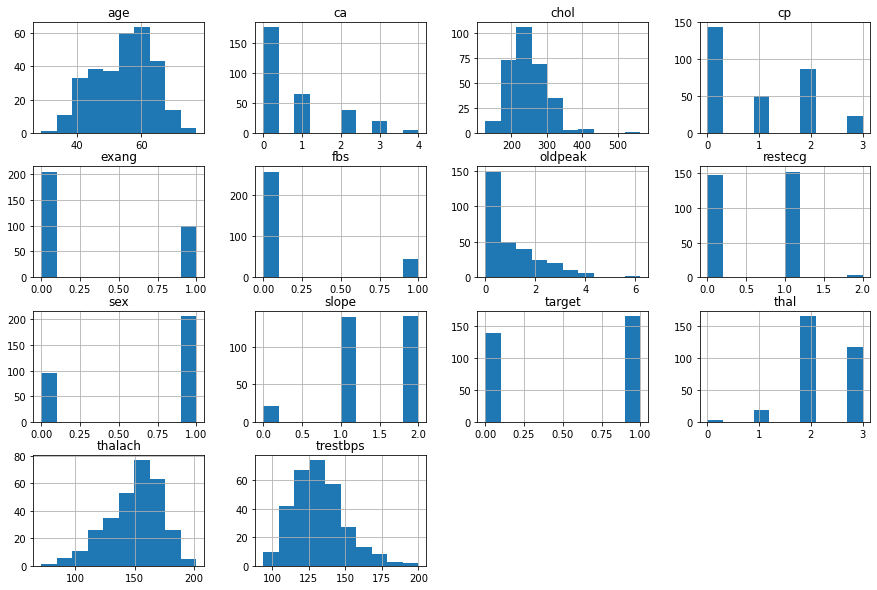

In [8]:
#plotting  histogram 
plt.rcParams['figure.figsize'] = 15,10
df.hist()

# Plotting Heatmap (using seaborn)  - Correlation

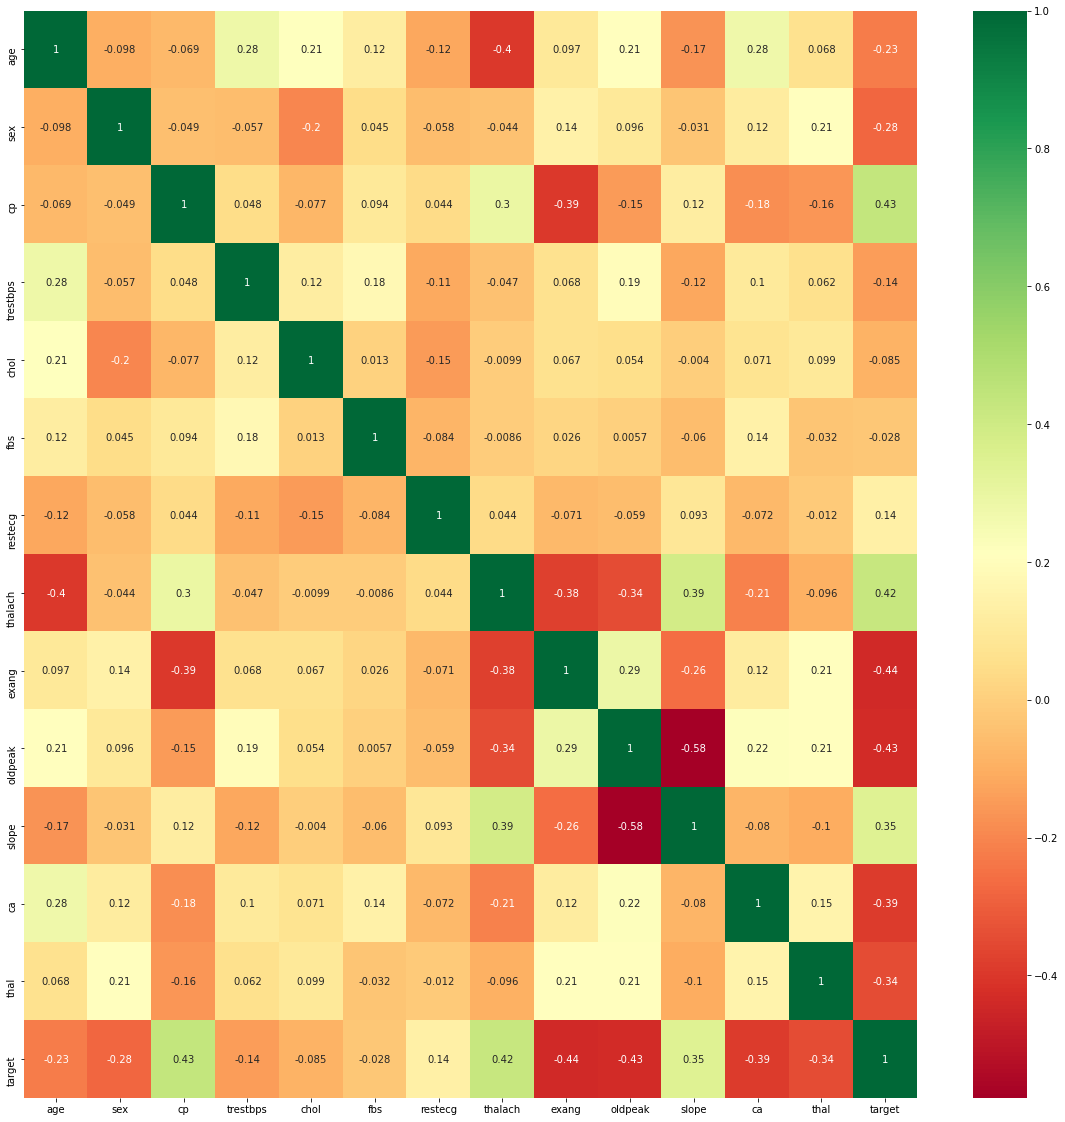

In [9]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

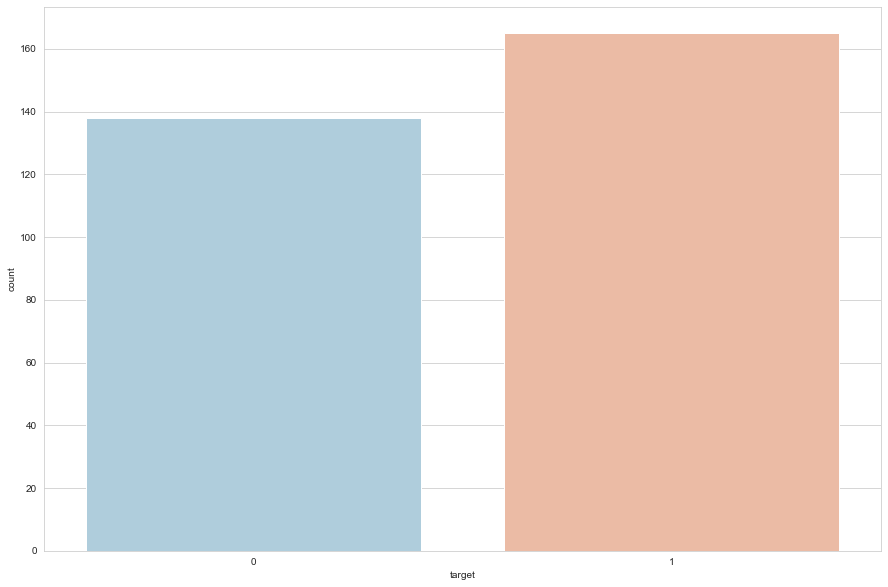

In [10]:
#making a counterplot
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

### Data Processing

 

scale the values before training the Machine Learning model

In [11]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [12]:
y = df['target']  #dependant feature
X = df.drop(['target'], axis = 1)  #independant feature

In [13]:
from sklearn.model_selection import cross_val_score  #cross validation 
knn_scores = []
for k in range(1,25):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

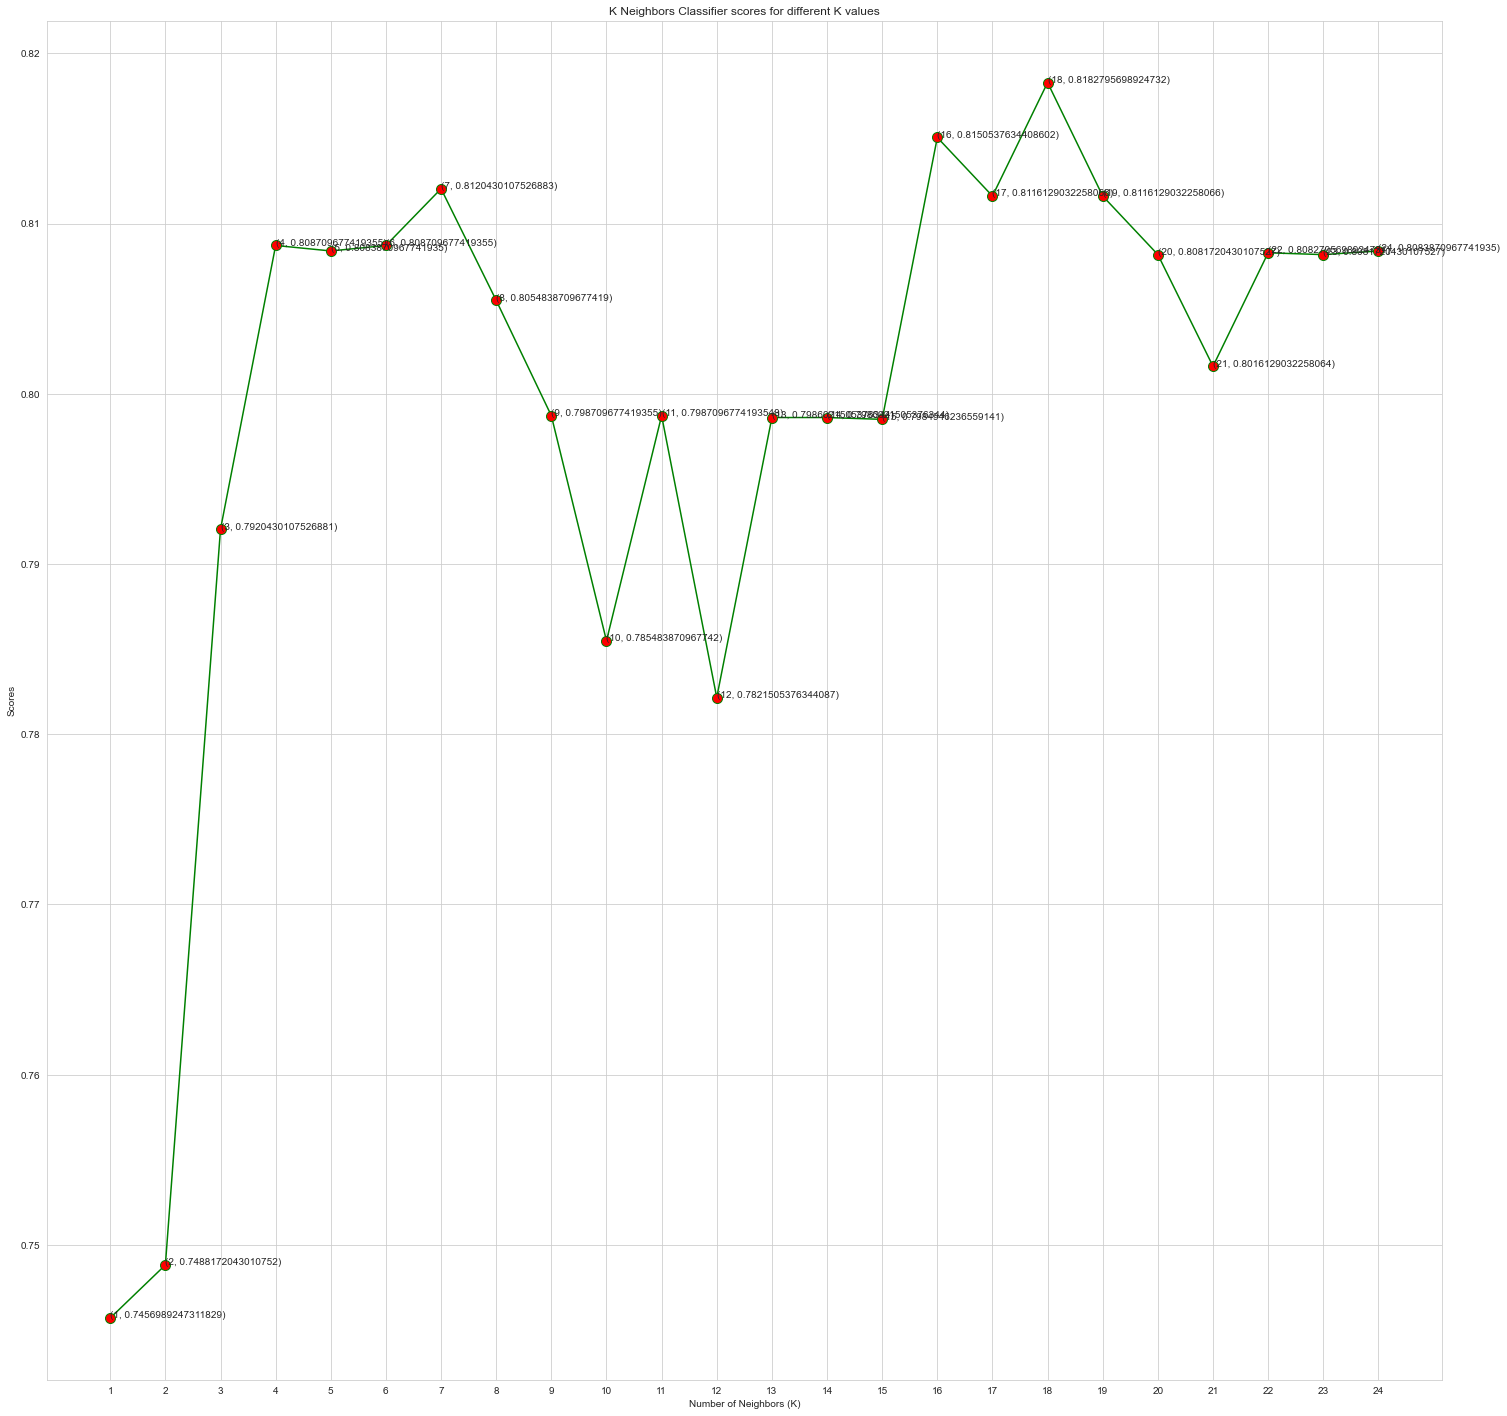

In [14]:
plt.rcParams['figure.figsize'] = 25,25
plt.plot([k for k in range(1,25)], knn_scores, color = 'green',marker='o',markerfacecolor='red',markersize=10)
for i in range(1,25):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1,25)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')


In [15]:
knn_classifier = KNeighborsClassifier(n_neighbors =18) #taking k as 18 as it shows the highest 
score=cross_val_score(knn_classifier,X,y,cv=10)

In [16]:
#showing for all the values of k 
knn_scores

[0.7456989247311829,
 0.7488172043010752,
 0.7920430107526881,
 0.808709677419355,
 0.8083870967741935,
 0.808709677419355,
 0.8120430107526883,
 0.8054838709677419,
 0.798709677419355,
 0.785483870967742,
 0.7987096774193548,
 0.7821505376344087,
 0.7986021505376344,
 0.7986021505376344,
 0.7984946236559141,
 0.8150537634408602,
 0.8116129032258066,
 0.8182795698924732,
 0.8116129032258066,
 0.8081720430107527,
 0.8016129032258064,
 0.8082795698924731,
 0.8081720430107527,
 0.8083870967741935]

In [17]:
#taking mean of the score
score.mean()

0.8182795698924732